##### 부동산 데이터

In [120]:
import pandas as pd

land_data = pd.read_csv('../한국자산관리공사_국유부동산 매각현황_20231231.csv',encoding='cp949')
print(land_data)

        연도구분     지역구분                       소재지명 재산구분 공부지목  대장면적(제곱미터)  \
0       2014    서울특별시      서울특별시 종로구 창성동  117-10   토지    대           4   
1       2014    서울특별시      서울특별시 종로구 옥인동  47-255   토지    대          10   
2       2014    서울특별시        서울특별시 종로구 사직동  1-31   토지    대           5   
3       2014    서울특별시        서울특별시 종로구 세종로  86-2   토지    대          11   
4       2014    서울특별시        서울특별시 종로구 세종로  89-2   토지    대           1   
...      ...      ...                        ...  ...  ...         ...   
161746  2023  전북특별자치도   전북특별자치도 부안군 줄포면 신리 867-2   토지   구거         220   
161747  2023  전북특별자치도   전북특별자치도 부안군 줄포면 신리 867-3   토지   구거          30   
161748  2023  전북특별자치도     전북특별자치도 부안군 줄포면 신리 901   토지   구거         680   
161749  2023  전북특별자치도    전북특별자치도 부안군 줄포면 파산리 620   토지    대         274   
161750  2023  전북특별자치도  전북특별자치도 부안군 위도면 진리 525-10   토지    대          67   

          대장금액(원)       처분구분명        계약일자        부서         팀  
0         7372000    처분(매각수의)  2014-04-07  서울서부

- 필수분석
1. 매각금액이 가장 많은 팀과 하위팀의 차이 확인하기
2. 연도별 매각금액 추이 확인하기
3. 상위 5개 지역별 매격 면적 확인하기
4. 계약 일자 정보 기준으로 매각이 많은 때의 특징 알아보기

1. 가장 많은 팀과 하위팀 차이 확인

In [121]:
print(land_data['처분구분명'].unique())
maegak_land_data = land_data.copy()
maegak_land_data.query("처분구분명 == '처분(매각수의)' or 처분구분명 == '처분(매각입찰)'",inplace=True)
print(maegak_land_data['처분구분명'].unique())

['처분(매각수의)' '처분(무상관리전환)' '처분(매각입찰)' '처분(유상관리전환)' '처분(무상양여)' '처분(무상귀속)'
 '처분(유상양여)' '처분(사용승인)']
['처분(매각수의)' '처분(매각입찰)']


In [122]:
grouped = maegak_land_data.groupby('팀')
grouped_sum = grouped['대장금액(원)'].agg(['sum']).sort_values(['sum'],ascending=False) #만들어진 것에서 groupby로 팀별로 묶고
#대장금액 sum을 하고 가장 정렬을함
print(grouped_sum.iloc[0][0],grouped_sum.iloc[-1][0])
print(grouped_sum.iloc[0],grouped_sum.iloc[-1])
grouped_sum = grouped_sum.rename(columns={'sum':'금액합계'})
import plotly.express as px
print(grouped_sum.index)

fig = px.bar(grouped_sum,grouped_sum.index,y=grouped_sum['금액합계'])
fig.show()

1703642957752 25217099875
sum    1703642957752
Name: 국유재산3팀, dtype: int64 sum    25217099875
Name: 국유세종팀, dtype: int64
Index(['국유재산3팀', '국유재산2팀', '국유재산1팀', '국유재산관리3팀', '국유재산관리2팀', '국유재산관리1팀',
       '국유재산관리4팀', '내포지사', '울산지사', '평택지사', '의정부지사', '국유재산관리5팀', '국유1팀', '포항지사',
       '국유진주지사', '춘천지사', '원주지사', '국유통영지사', '군산지사', '충주지사', '국유목포지사', '국유제주지사',
       '국유2팀', '안동지사', '국유여수지사', '국유세종팀'],
      dtype='object', name='팀')


- 연도별 매각금액 추이

              금액합계
연도구분              
2014  572278010750
2015  853814820630
2016  569395066078
2017  634070723300
2018  366830186839
2019  518050454426
2020  797249353487
2021  876799619786
2022  844311996474
2023  899469836614


<Axes: xlabel='연도구분', ylabel='대장금액(원)'>

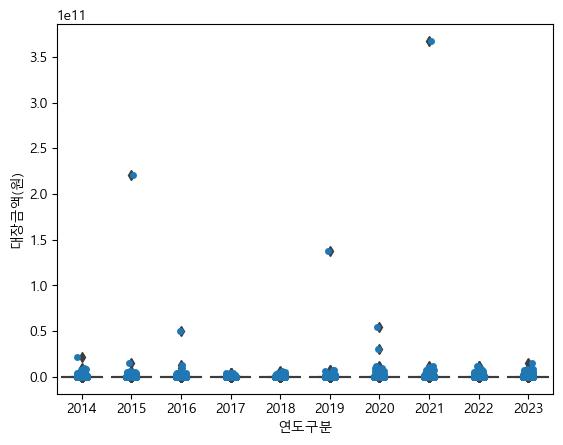

In [123]:
import matplotlib.pyplot as plt
import matplotlib

plt.rc('font', family='Malgun Gothic') #윈도우에서 한글 사용할 수 있게 해줌
matplotlib.rcParams['axes.unicode_minus'] = False #마이너스 기호 오류 해결하기 (유니코드의 -기호를 사용하지 않겠다.)
years_maegak_land_data = maegak_land_data.copy()
years_grouped = years_maegak_land_data.groupby('연도구분')
years_grouped_sum = years_grouped['대장금액(원)'].agg(['sum'])
years_grouped_sum = years_grouped_sum.rename(columns={'sum':'금액합계'})
print(years_grouped_sum)
import seaborn as sns
fig2 = px.line(years_grouped_sum,x=years_grouped_sum.index,y='금액합계')
#fig2 = px.box(years_grouped_sum,x=years_grouped_sum.index,y=years_grouped_sum['sum'])
fig2.show()


sns.boxplot(maegak_land_data,x='연도구분',y='대장금액(원)')
sns.stripplot(maegak_land_data,x='연도구분',y='대장금액(원)')

- 상위 5개 지역별 매각면적

In [124]:
maegak_land_data_myun = maegak_land_data.copy()
grouped2 = maegak_land_data_myun.groupby('지역구분')
myun = grouped2['대장면적(제곱미터)'].agg(['sum']).sort_values('sum',ascending=False)
myun = myun.rename(columns={'sum':'면적합계'})
print(myun)
sel_myun_top5 = myun[:5]
fig3 = px.pie(sel_myun_top5,sel_myun_top5.index,sel_myun_top5['면적합계'])
fig3.show()
fig4 = px.bar(sel_myun_top5,sel_myun_top5.index,sel_myun_top5['면적합계'])
fig4.show()

            면적합계
지역구분            
경기도      9275308
강원도      9057538
전라남도     6350718
경상북도     5159113
경상남도     4912821
충청남도     4881987
전라북도     4766021
충청북도     2977810
부산광역시    1521096
인천광역시    1506017
광주광역시    1295716
강원특별자치도   755582
서울특별시     691990
울산광역시     671887
대구광역시     461787
대전광역시     438797
제주특별자치도   379139
전북특별자치도   374162
세종특별자치시   251839


- 계약일자 정보 기준으로 매각이 많은 때의 특징 알아보기

In [125]:
date_info = land_data.copy()
grouped_date = date_info.groupby(['계약일자'])
grouped4 = grouped_date['대장금액(원)'].agg(['sum'])
grouped4 = grouped4.rename(columns={'sum':'금액'})
fig5 = px.line(grouped4,x=grouped4.index,y=grouped4['금액'])
fig5.show()
sort_v = grouped4.sort_values(['금액'],ascending=False)
print(sort_v[:5])

                      금액
계약일자                    
2021-07-01  371596015888
2015-08-21  241142446788
2021-07-09  201986368010
2021-05-18  144972917508
2019-02-15  137993548585


In [126]:
top_10_date = list(sort_v.index[:10])
print(top_10_date)
q_land = land_data.query(f"계약일자 in {top_10_date}")
print(q_land)
fig6 = px.pie(q_land,names=q_land['지역구분'],values=q_land['대장금액(원)'])
fig6.show()

['2021-07-01', '2015-08-21', '2021-07-09', '2021-05-18', '2019-02-15', '2015-12-03', '2020-05-18', '2023-12-19', '2015-11-30', '2022-04-06']
        연도구분     지역구분                       소재지명 재산구분 공부지목  대장면적(제곱미터)  \
17113   2015    서울특별시       서울특별시 종로구 도렴동  128-5   토지   도로           4   
17114   2015    서울특별시       서울특별시 종로구 도렴동  128-6   토지   도로           3   
17115   2015    서울특별시         서울특별시 종로구 도렴동  137   토지   도로         410   
17116   2015    서울특별시        서울특별시 종로구 세종로  81-3   토지    대        7937   
17117   2015    서울특별시       서울특별시 종로구 세종로  81-13   토지   도로         101   
...      ...      ...                        ...  ...  ...         ...   
159225  2023  강원특별자치도     강원특별자치도 태백시 문곡동 114-13   토지  잡종지          37   
159229  2023  강원특별자치도    강원특별자치도 태백시 동점동 498-121   토지  잡종지         345   
160346  2023  강원특별자치도  강원특별자치도 양양군 양양읍 송암리 29-24   토지    답         216   
160347  2023  강원특별자치도  강원특별자치도 양양군 양양읍 송암리 29-25   토지    답         454   
160351  2023  강원특별자치도  강원특별자치도 양양군 양양읍 송암리 43

In [127]:
fig6_1 = px.box(q_land,x=q_land['지역구분'],y=q_land['대장금액(원)'])
fig6_1.show()

In [128]:
fig7 = px.pie(q_land,names=q_land['지역구분'],values=q_land['대장면적(제곱미터)'])
fig7.show()

- 거래 금액이 가장 많이 일어난 날짜에 거래된 금액의 흐름은 82.5%의 압도적인 흐름으로 서울에서 거래가 일어남
- 하지만 면적은 서울시는 46.4%에 불과함, 다른 지역에 비해서 서울시의 집값이 비싸다는 것을 한눈에 볼 수 있음

- 전국 거래 데이터를 통해서 거래면적대비 땅값 추이를 확인하자

In [129]:
#myun #면적 합
locate_maegak_land_data = maegak_land_data.copy()
locate_grouped = locate_maegak_land_data.groupby('지역구분')
locate_grouped_sum = locate_grouped['대장금액(원)'].agg(['sum'])
locate_grouped_sum = locate_grouped_sum.rename(columns={'sum':'금액합계'})
print(locate_grouped_sum.iloc[0][0])
print(myun.iloc[0][0])
result_list = []
for i in range(len(myun)):
    result_list.append(locate_grouped_sum.iloc[i][0] / myun.iloc[i][0])
print(result_list)
result_df = pd.DataFrame(result_list,index= list(myun.index))
result_df = result_df.rename(columns={0:'면적대비 가격'})
print(result_df)
fig_9 = px.bar(result_df,)
fig_9.show()

230843934671
9275308
[24888.00745711086, 2594.8987551584105, 294126.42799696035, 61328.6999034524, 51768.832690830786, 51295.56621781254, 45202.676451488565, 33763.34740127812, 384762.3197911243, 1192909.2862789729, 13345.953167206393, 161440.6353526156, 612013.2189236839, 182441.72834122405, 244436.86751684218, 34240.67090476918, 94293.63416583365, 870465.5005559089, 462051.1005007167]
              면적대비 가격
경기도      2.488801e+04
강원도      2.594899e+03
전라남도     2.941264e+05
경상북도     6.132870e+04
경상남도     5.176883e+04
충청남도     5.129557e+04
전라북도     4.520268e+04
충청북도     3.376335e+04
부산광역시    3.847623e+05
인천광역시    1.192909e+06
광주광역시    1.334595e+04
강원특별자치도  1.614406e+05
서울특별시    6.120132e+05
울산광역시    1.824417e+05
대구광역시    2.444369e+05
대전광역시    3.424067e+04
제주특별자치도  9.429363e+04
전북특별자치도  8.704655e+05
세종특별자치시  4.620511e+05
